![TELCO Logo](https://upload.wikimedia.org/wikipedia/commons/6/6d/Telco_System_Logo.jpg)

# TELCO Classification Project 
### - by Jeff Akins

## Executive Summary
#### Why are our customers churning?
#### Can we detirmine the cause of churn?
- 

### Imports:

In [1]:
import acquire as aq
import prepare as prep
import explore
import model_functions as model

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing

import warnings
warnings.filterwarnings("ignore")

## Plan:
- Initially model all data
- Refine features based on explore results

## Acquire:
- Acquire function brings in TELCO data from SQL server

In [2]:
telco_df = aq.get_telco_data() 
telco_df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)


## Prepare:
- Uses the acquire function to bring in the Telco Data
- Drop Duplicates
- Removed white space
- Replaced 'total_charges' empty cells with 0 due to tenure = 0
- Convert 'total_charges' from obj to float
- Encoding (Changing Yes to 1 and No to 0)
- Created dummy variables for 'gender', 'contract', 'internet', 'payment_type' 
- Concatenated dummy variables
- Dropped 7 redundant columns
- Renamed 12 columns to shorten the names

In [3]:
telco_df = prep.prep_telco()
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   online_security    7043 non-null   int64  
 8   online_backup      7043 non-null   int64  
 9   device_protection  7043 non-null   int64  
 10  tech_support       7043 non-null   int64  
 11  streaming_tv       7043 non-null   int64  
 12  streaming_movies   7043 non-null   int64  
 13  paperless_billing  7043 non-null   int64  
 14  monthly_charges    7043 non-null   float64
 15  total_charges      7043 non-null   float64
 16  churn              7043 

In [4]:
telco_df.head(3)

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_contract,one_yr_contract,two_yr_contract,dsl,fiber,no_internet,bank_transfer,credit_card,electronic_check,mailed_check
0,0016-QLJIS,0,1,1,65,1,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
1,0017-DINOC,0,0,0,54,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
2,0019-GFNTW,0,0,0,56,0,0,1,1,1,...,0,0,1,1,0,0,1,0,0,0


### Train, Validate, Test

In [5]:
train, validate, test = explore.train_validate_test_split(telco_df, 'churn', seed=123)

train:    (3943, 29)
validate: (1691, 29)
test:     (1409, 29)


## Explore:
#### Findings:
- 

### Univariate

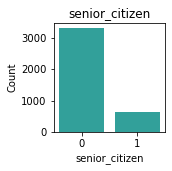

   senior_citizen  Count  Percent
0               0   3303    83.77
1               1    640    16.23
_________________________________________________________________


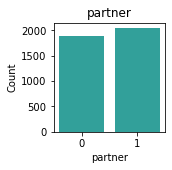

   partner  Count  Percent
0        1   2044    51.84
1        0   1899    48.16
_________________________________________________________________


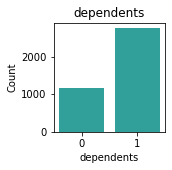

   dependents  Count  Percent
0           1   2764     70.1
1           0   1179     29.9
_________________________________________________________________


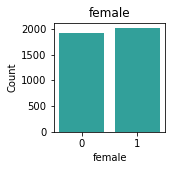

   female  Count  Percent
0       1   2013    51.05
1       0   1930    48.95
_________________________________________________________________


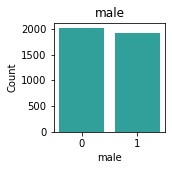

   male  Count  Percent
1     0   2013    51.05
0     1   1930    48.95
_________________________________________________________________


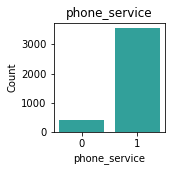

   phone_service  Count  Percent
1              1   3550    90.03
0              0    393     9.97
_________________________________________________________________


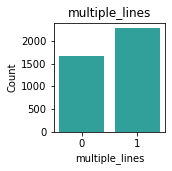

   multiple_lines  Count  Percent
0               1   2277    57.75
1               0   1666    42.25
_________________________________________________________________


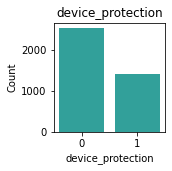

   device_protection  Count  Percent
0                  0   2534    64.27
1                  1   1409    35.73
_________________________________________________________________


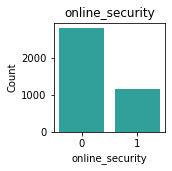

   online_security  Count  Percent
0                0   2794    70.86
1                1   1149    29.14
_________________________________________________________________


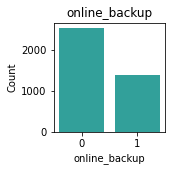

   online_backup  Count  Percent
0              0   2541    64.44
1              1   1402    35.56
_________________________________________________________________


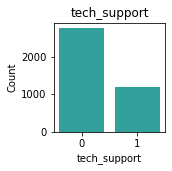

   tech_support  Count  Percent
0             0   2759    69.97
1             1   1184    30.03
_________________________________________________________________


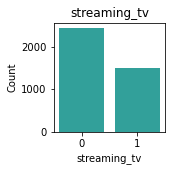

   streaming_tv  Count  Percent
0             0   2435    61.76
1             1   1508    38.24
_________________________________________________________________


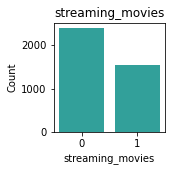

   streaming_movies  Count  Percent
0                 0   2389    60.59
1                 1   1554    39.41
_________________________________________________________________


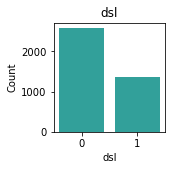

   dsl  Count  Percent
0    0   2578    65.38
1    1   1365    34.62
_________________________________________________________________


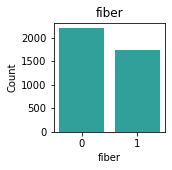

   fiber  Count  Percent
0      0   2203    55.87
1      1   1740    44.13
_________________________________________________________________


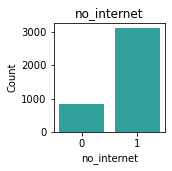

   no_internet  Count  Percent
0            1   3105    78.75
1            0    838    21.25
_________________________________________________________________


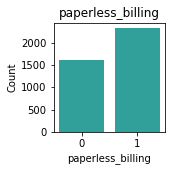

   paperless_billing  Count  Percent
1                  1   2324    58.94
0                  0   1619    41.06
_________________________________________________________________


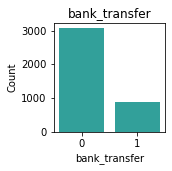

   bank_transfer  Count  Percent
0              0   3064    77.71
1              1    879    22.29
_________________________________________________________________


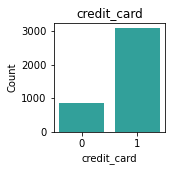

   credit_card  Count  Percent
0            1   3091    78.39
1            0    852    21.61
_________________________________________________________________


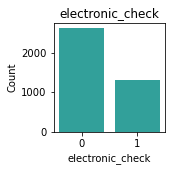

   electronic_check  Count  Percent
0                 0   2623    66.52
1                 1   1320    33.48
_________________________________________________________________


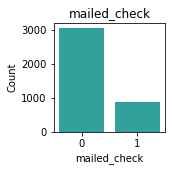

   mailed_check  Count  Percent
0             0   3051    77.38
1             1    892    22.62
_________________________________________________________________


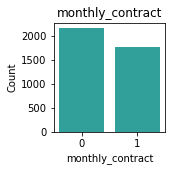

   monthly_contract  Count  Percent
1                 0   2162    54.83
0                 1   1781    45.17
_________________________________________________________________


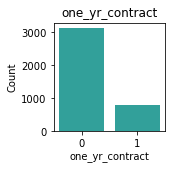

   one_yr_contract  Count  Percent
0                0   3136    79.53
1                1    807    20.47
_________________________________________________________________


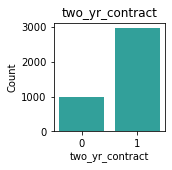

   two_yr_contract  Count  Percent
0                1   2969     75.3
1                0    974     24.7
_________________________________________________________________


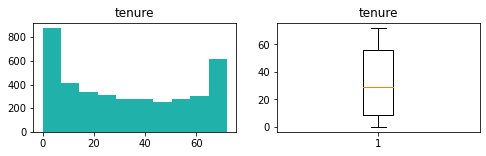

count    3943.000000
mean       32.673852
std        24.472862
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


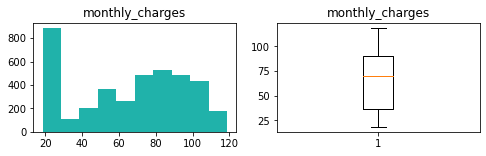

count    3943.000000
mean       65.102790
std        30.128631
min        18.550000
25%        36.200000
50%        70.400000
75%        90.050000
max       118.650000
Name: monthly_charges, dtype: float64


In [6]:
cat_vars = ['senior_citizen', 'partner', 'dependents', 'female', 'male', 'phone_service', 'multiple_lines', 'device_protection', 'online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'dsl', 'fiber', 'no_internet', 'paperless_billing', 'bank_transfer', 'credit_card', 'electronic_check', 'mailed_check', 'monthly_contract', 'one_yr_contract', 'two_yr_contract']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_univariate(train, cat_vars, quant_vars)

### Bivariate

senior_citizen 
_____________________

         chi2       p-value  degrees of freedom
0  106.962416  4.536923e-25                   1

observed:
 churn              0     1   All
senior_citizen                  
0               2533   770  3303
1                364   276   640
All             2897  1046  3943

expected:
              0           1
0  2426.779356  876.220644
1   470.220644  169.779356


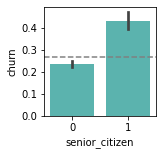


_____________________

partner 
_____________________

        chi2       p-value  degrees of freedom
0  74.137206  7.287185e-18                   1

observed:
 churn       0     1   All
partner                  
0        1382   662  2044
1        1515   384  1899
All      2897  1046  3943

expected:
              0           1
0  1501.767182  542.232818
1  1395.232818  503.767182


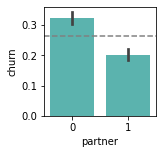


_____________________

dependents 
_____________________

         chi2       p-value  degrees of freedom
0  100.546984  1.156215e-23                   1

observed:
 churn          0     1   All
dependents                  
0           1903   861  2764
1            994   185  1179
All         2897  1046  3943

expected:
              0           1
0  2030.765407  733.234593
1   866.234593  312.765407


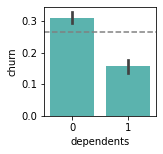


_____________________

female 
_____________________

       chi2  p-value  degrees of freedom
0  0.156993  0.69194                   1

observed:
 churn      0     1   All
female                  
0       1473   540  2013
1       1424   506  1930
All     2897  1046  3943

expected:
             0          1
0  1478.99087  534.00913
1  1418.00913  511.99087


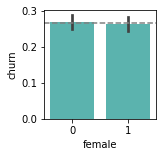


_____________________

male 
_____________________

       chi2  p-value  degrees of freedom
0  0.156993  0.69194                   1

observed:
 churn     0     1   All
male                   
0      1424   506  1930
1      1473   540  2013
All    2897  1046  3943

expected:
             0          1
0  1418.00913  511.99087
1  1478.99087  534.00913


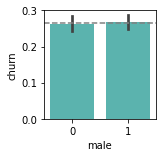


_____________________

phone_service 
_____________________

       chi2   p-value  degrees of freedom
0  0.480275  0.488298                   1

observed:
 churn             0     1   All
phone_service                  
0               295    98   393
1              2602   948  3550
All            2897  1046  3943

expected:
              0           1
0   288.744864  104.255136
1  2608.255136  941.744864


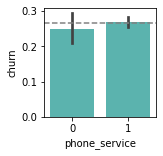


_____________________

multiple_lines 
_____________________

       chi2   p-value  degrees of freedom
0  6.737101  0.009443                   1

observed:
 churn              0     1   All
multiple_lines                  
0               1709   568  2277
1               1188   478  1666
All             2897  1046  3943

expected:
              0           1
0  1672.956886  604.043114
1  1224.043114  441.956886


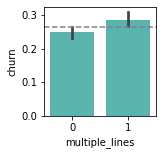


_____________________

device_protection 
_____________________

        chi2   p-value  degrees of freedom
0  15.486434  0.000083                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1809   725  2534
1                  1088   321  1409
All                2897  1046  3943

expected:
              0           1
0  1861.779863  672.220137
1  1035.220137  373.779863


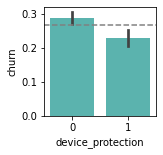


_____________________

online_security 
_____________________

         chi2       p-value  degrees of freedom
0  127.616329  1.361803e-29                   1

observed:
 churn               0     1   All
online_security                  
0                1910   884  2794
1                 987   162  1149
All              2897  1046  3943

expected:
           0        1
0  2052.807  741.193
1   844.193  304.807


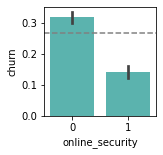


_____________________

online_backup 
_____________________

        chi2       p-value  degrees of freedom
0  24.305641  8.219800e-07                   1

observed:
 churn             0     1   All
online_backup                  
0              1801   740  2541
1              1096   306  1402
All            2897  1046  3943

expected:
              0           1
0  1866.922901  674.077099
1  1030.077099  371.922901


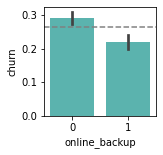


_____________________

tech_support 
_____________________

         chi2       p-value  degrees of freedom
0  122.409967  1.877443e-28                   1

observed:
 churn            0     1   All
tech_support                  
0             1886   873  2759
1             1011   173  1184
All           2897  1046  3943

expected:
              0           1
0  2027.091808  731.908192
1   869.908192  314.091808


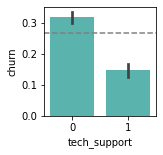


_____________________

streaming_tv 
_____________________

        chi2   p-value  degrees of freedom
0  18.826896  0.000014                   1

observed:
 churn            0     1   All
streaming_tv                  
0             1848   587  2435
1             1049   459  1508
All           2897  1046  3943

expected:
              0           1
0  1789.042607  645.957393
1  1107.957393  400.042607


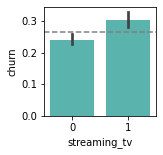


_____________________

streaming_movies 
_____________________

        chi2   p-value  degrees of freedom
0  14.879228  0.000115                   1

observed:
 churn                0     1   All
streaming_movies                  
0                 1808   581  2389
1                 1089   465  1554
All               2897  1046  3943

expected:
              0           1
0  1755.245498  633.754502
1  1141.754502  412.245498


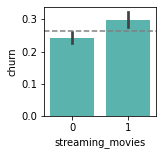


_____________________

dsl 
_____________________

        chi2       p-value  degrees of freedom
0  60.526153  7.260737e-15                   1

observed:
 churn     0     1   All
dsl                    
0      1791   787  2578
1      1106   259  1365
All    2897  1046  3943

expected:
              0           1
0  1894.107532  683.892468
1  1002.892468  362.107532


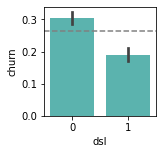


_____________________

fiber 
_____________________

         chi2       p-value  degrees of freedom
0  362.033241  1.015910e-80                   1

observed:
 churn     0     1   All
fiber                  
0      1881   322  2203
1      1016   724  1740
All    2897  1046  3943

expected:
              0           1
0  1618.587624  584.412376
1  1278.412376  461.587624


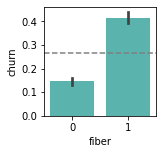


_____________________

no_internet 
_____________________

         chi2       p-value  degrees of freedom
0  196.074908  1.501123e-44                   1

observed:
 churn           0     1   All
no_internet                  
0            2122   983  3105
1             775    63   838
All          2897  1046  3943

expected:
              0           1
0  2281.304844  823.695156
1   615.695156  222.304844


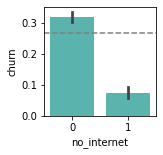


_____________________

paperless_billing 
_____________________

         chi2       p-value  degrees of freedom
0  137.624538  8.804467e-32                   1

observed:
 churn                 0     1   All
paperless_billing                  
0                  1350   269  1619
1                  1547   777  2324
All                2897  1046  3943

expected:
              0           1
0  1189.511286  429.488714
1  1707.488714  616.511286


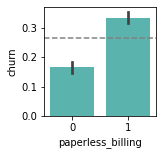


_____________________

bank_transfer 
_____________________

        chi2       p-value  degrees of freedom
0  52.599269  4.090415e-13                   1

observed:
 churn             0     1   All
bank_transfer                  
0              2167   897  3064
1               730   149   879
All            2897  1046  3943

expected:
              0           1
0  2251.181334  812.818666
1   645.818666  233.181334


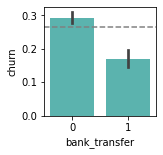


_____________________

credit_card 
_____________________

       chi2       p-value  degrees of freedom
0  62.94175  2.129110e-15                   1

observed:
 churn           0     1   All
credit_card                  
0            2180   911  3091
1             717   135   852
All          2897  1046  3943

expected:
              0           1
0  2271.018767  819.981233
1   625.981233  226.018767


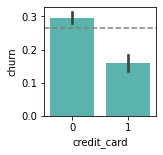


_____________________

electronic_check 
_____________________

         chi2       p-value  degrees of freedom
0  348.804275  7.718393e-78                   1

observed:
 churn                0     1   All
electronic_check                  
0                 2172   451  2623
1                  725   595  1320
All               2897  1046  3943

expected:
              0           1
0  1927.169921  695.830079
1   969.830079  350.169921


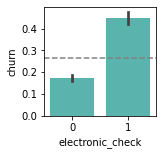


_____________________

mailed_check 
_____________________

        chi2       p-value  degrees of freedom
0  35.524332  2.518844e-09                   1

observed:
 churn            0     1   All
mailed_check                  
0             2172   879  3051
1              725   167   892
All           2897  1046  3943

expected:
              0           1
0  2241.629977  809.370023
1   655.370023  236.629977


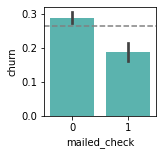


_____________________

monthly_contract 
_____________________

         chi2        p-value  degrees of freedom
0  658.262341  3.566418e-145                   1

observed:
 churn                0     1   All
monthly_contract                  
0                 1663   118  1781
1                 1234   928  2162
All               2897  1046  3943

expected:
              0           1
0  1308.535886  472.464114
1  1588.464114  573.535886


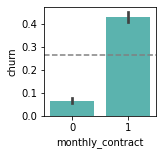


_____________________

one_yr_contract 
_____________________

         chi2       p-value  degrees of freedom
0  134.225264  4.877529e-31                   1

observed:
 churn               0     1   All
one_yr_contract                  
0                2174   962  3136
1                 723    84   807
All              2897  1046  3943

expected:
              0           1
0  2304.081156  831.918844
1   592.918844  214.081156


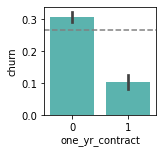


_____________________

two_yr_contract 
_____________________

         chi2       p-value  degrees of freedom
0  350.649373  3.060060e-78                   1

observed:
 churn               0     1   All
two_yr_contract                  
0                1957  1012  2969
1                 940    34   974
All              2897  1046  3943

expected:
              0           1
0  2181.382957  787.617043
1   715.617043  258.382957


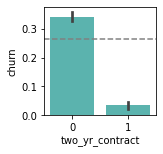


_____________________

tenure 
____________________



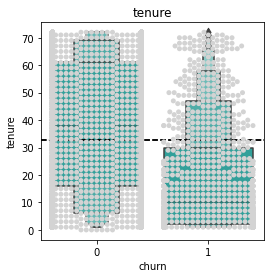

        count       mean        std  min   25%   50%   75%   max
churn                                                           
0      2897.0  37.853642  23.956034  0.0  16.0  38.0  61.0  72.0
1      1046.0  18.327916  19.709773  1.0   2.0  10.0  30.0  72.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2242516.5, pvalue=1.1957988576110993e-117)

____________________

monthly_charges 
____________________



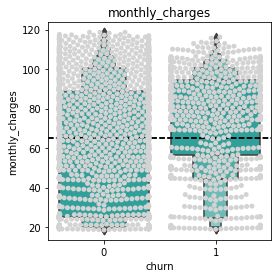

        count       mean        std    min    25%     50%      75%     max
churn                                                                     
0      2897.0  61.680877  31.166578  18.55  25.15  64.900  88.9000  118.65
1      1046.0  74.580115  24.696621  18.85  56.25  79.925  94.3875  116.20 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1160715.0, pvalue=2.891105812698731e-29)

____________________



In [7]:
target = 'churn'
cat_vars = ['senior_citizen', 'partner', 'dependents', 'female', 'male', 'phone_service', 'multiple_lines', 'device_protection', 'online_security', 'online_backup', 'tech_support', 'streaming_tv', 'streaming_movies', 'dsl', 'fiber', 'no_internet', 'paperless_billing', 'bank_transfer', 'credit_card', 'electronic_check', 'mailed_check', 'monthly_contract', 'one_yr_contract', 'two_yr_contract']
quant_vars = ['tenure', 'monthly_charges']

explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

### Multivariate

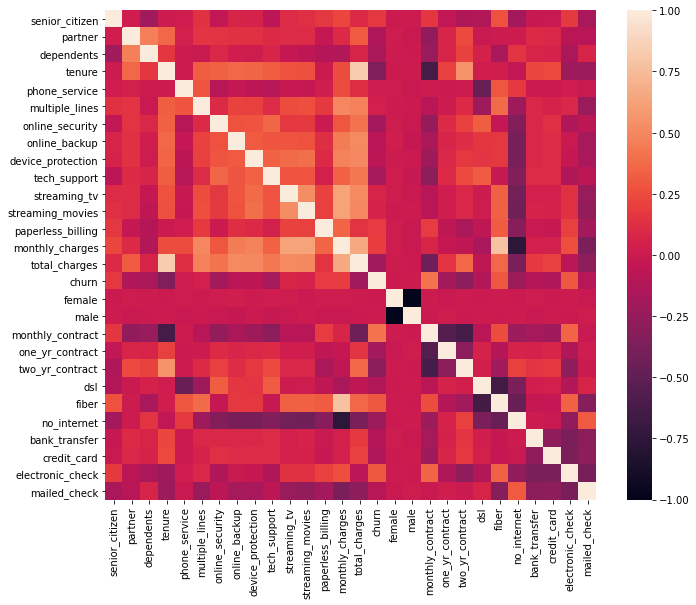

In [8]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train.corr())
plt.show()

## Model & Evaluate:
#### Baseline: 0.73

In [9]:
X_train = train.drop(columns=['customer_id', 'churn'])
y_train = train.churn

X_validate = validate.drop(columns=['customer_id', 'churn'])
y_validate = validate.churn

X_test = test.drop(columns=['customer_id', 'churn'])
y_test = test.churn

### All Data:

#### Decision Tree